In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('bhp2.csv')
print(df.shape)
df.describe()

(13200, 7)


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Removing outliers using percentile technique

In [31]:
min_threshold,max_threshold = df['price_per_sqft'].quantile([0.001,0.999])
df_new = df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]
print(df_new.shape)
df_new.describe()

(13172, 7)


,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


### Removing outliers from the current dataframe using 4 standard deviations

In [34]:
upper_limit = df_new['price_per_sqft'].mean() + 4*df_new['price_per_sqft'].std()
lower_limit = df_new['price_per_sqft'].mean() - 4*df_new['price_per_sqft'].std()
df_new2 = df_new[(df_new.price_per_sqft>lower_limit) & (df_new.price_per_sqft<upper_limit)]
print(df_new2.shape)
df_new2.describe()

(13047, 7)


,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


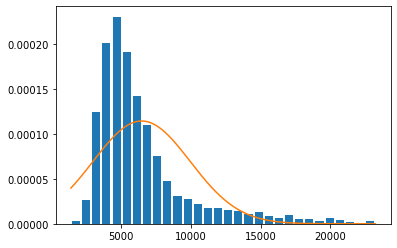

In [45]:
plt.hist(df_new2['price_per_sqft'],bins=30,density=True,rwidth=0.8)
rng = np.arange(df_new2['price_per_sqft'].min(),df_new2['price_per_sqft'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df_new2['price_per_sqft'].mean(),df_new2['price_per_sqft'].std()))
plt.show()

### Removing outliers using z_scores

In [49]:
df_new['z_score'] = (df_new['price_per_sqft']-df_new['price_per_sqft'].mean())/df_new.price_per_sqft.std()
df_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [51]:
df_new3 = df_new[(df_new.z_score<4) & (df_new.z_score>-4)]
print(df_new3.shape)
df_new3.describe()

(13047, 8)


,total_sqft,bath,price,bhk,price_per_sqft,z_score
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045,-0.051757
std,948.777194,1.26673,118.818313,1.211623,3487.670005,0.842225
min,250.000000,1.00000,8.000000,1.000000,1379.000000,-1.276172
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000,-0.580691
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000,-0.301533
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000,0.134833
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000,3.996683


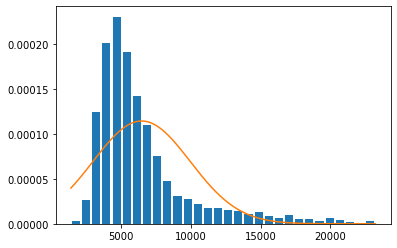

In [52]:
plt.hist(df_new3['price_per_sqft'],bins=30,density=True,rwidth=0.8)
rng = np.arange(df_new3['price_per_sqft'].min(),df_new3['price_per_sqft'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df_new3['price_per_sqft'].mean(),df_new3['price_per_sqft'].std()))
plt.show()